# Sistemas Inteligentes

## Exercício Computacional 4 - Agrupamento (Clusterização)

## Instruções

1. Escolha um dataset, identifique-o e mostre suas características, então indique quais são os seus objetivos com esse dataset (no campo correspondente).

2. Com o dataset já importado para o notebook, faça os pré-processamentos que julgar necessários e, se for conveniente, efetue uma redução de dimensionalidade utilizando um método compatível com seus dados.

3. Utilize ao menos um método de Cross-Validation de sua preferência.

4. Escolha dois métodos de agrupamento (clusterização) para realizar abordagens distintas, então aplique-os ao dataset para chegar ao objetivo indicado por você no próprio notebook.

5. Utilize células intermediárias de tipo _Markdown_ para explicar o que é feito em cada célula de código. Mas não deixe de utilizar comentários breves e pertinentes dentro do próprio código. Isto significa que o desenvolvimento NÃO deve ser feito em uma única célula.

6. Sempre que for cabível, exiba as figuras, os gráficos, os valores (ao menos parte deles) etc., mas procure sempre manter um capricho em todas as saídas.

7. Ao final, comente da forma mais completa possível os resultados obtidos, sempre sugerindo o que poderia ser feito para melhorá-los e fornecendo elementos que contribuam para a sua compreensão.

8. Respeitem as regras gramaticais e procurem manter coesão, coerência e fluidez em seus textos.

9. Apesar de a análise dos resultados ser mais importante do que o código em si, serão analisados critérios como organização e clareza do código, então evitem códigos "poluídos" e confusos.

## Dataset

### Importando Dataset e Criando Dataframe

Vamos importar o dataset de câncer de mama disponível no pacote scikit-learn. O dataset é idealizado para ser usado com algoritmos de classificação, tanto que possui uma coluna *target*, porém, aqui aplicaremos um algoritmo de clustering em conjunto com uma redução de dimensionalidade o que pode nos mostrar se os resultados de classificação estão alinhados com o clustering.

In [ ]:
# Importando biblioteca pandas
import pandas as pd

In [ ]:
# Importando dataset
from sklearn.datasets import load_breast_cancer
dados = load_breast_cancer()

In [ ]:
# Criando dataframe com base no dataset importado
dataframe = pd.DataFrame(dados.data, columns = dados.feature_names)
display(dataframe)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Perceba que o dataframe que construimos não contém a coluna de target, pois não queremos que a classificação correta afete o clustering realizado. Assim, ainda podemos comparar no final do experimento como o clustering classifica em comparação com o target real.

### Informações do Dataset

In [ ]:
# Verificando informações do dataset
print(dados.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Objetivos

O objetivo desse trabalho é aplicar um algoritmo de clustering sobre um dataset preparado para classificação. A ideia é comparar como o cluster realizado pelo algoritmo se compara com a classificação real. 

## Desenvolvimento

### Normalização dos Dados

Como já dissemos, pretendemos aplicar uma técnica de redução de dimensionalidade sobre os dados. Porém, como a técnica que aplicaremos baseia-se na variância, é necessário aplicar uma normalização sobre nosso dataframe. Para que nenhuma coluna seja muito mais influente que a outra na hora de realizar a redução de dimensionalidade só por causa de seu range.

In [ ]:
# Importando pré-processamento
from sklearn import preprocessing

In [ ]:
# Criando objeto normalizador
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
# Dataframe normalizado
dados_norm = min_max_scaler.fit_transform(dataframe)
dataframe_norm = pd.DataFrame(dados_norm, columns = dados.feature_names)
dataframe_norm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


### Redução de Dimensionalidade

Com os dados normalizados vamos aplicar a técnica de Análise de Componentes Principais (PCA) sobre o nosso dataframe, assim, podemos reduzir a dimensionalidade dos nossos dados para que possam ser usados no algoritmo de clusterização.

In [ ]:
# Importando PCA
from sklearn.decomposition import PCA

In [ ]:
# Criando dataframe com técnica PCA aplicada
dados_pca = PCA(n_components=2).fit_transform(dataframe_norm)
dataframe_pca = pd.DataFrame(dados_pca)

In [ ]:
# Visualizando dimensões do novo dataframe
dataframe_pca.shape

(569, 2)

### Visualizando Dados pós PCA

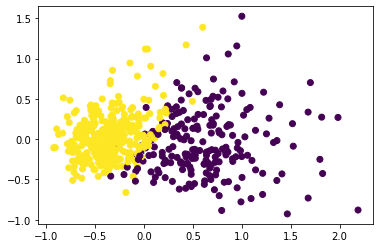

In [ ]:
# Plot dos dados pós aplicação do PCA
import matplotlib.pyplot as plt
plt.scatter(dataframe_pca[0], dataframe_pca[1], c = dados.target)

## Aplicação de Clustering

Para aplicar o clustering, foi escolhido dois algoritmos diferentes a fim de verificar os resultados obtidos por ambos e ver se condiz com a classificação real obtida no dataset.
Os algoritmos escolhidos foram o K-Means e o Affinity Propagation.

Após a normalização e aplicação do PCA para pré-processamento e redução de dimensionalidade, para iniciar, será aplicado o K-Means.
Será feito um split dos dados do dataset considerando 20% para teste. 
Após essa etapa, separaremos os centróides abordando as duas classes principais.

In [ ]:
from numpy.ma.core import shape
import numpy as np
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, Y_test = tts(dados_pca, dados.target, test_size=0.2, shuffle=False)

# Cálculo dos centróides

classe0 = []; classe1 = []
for i in range(y_train.shape[0]):
  if y_train[i] == 0:
    classe0.append(X_train[i])
  elif y_train[i] == 1:
    classe1.append(X_train[i])

classe0 = np.array(classe0)
classe1 = np.array(classe1)

classe0_mean = np.array([np.mean(classe0[:,0]), np.mean(classe0[:,1])])
classe1_mean = np.array([np.mean(classe1[:,0]), np.mean(classe1[:,1])])

classes_mean = np.vstack((classe0_mean, classe1_mean))

Após o cálculo de todos os centróides com base nos dados de treino, segue o gráfico de dispersão:

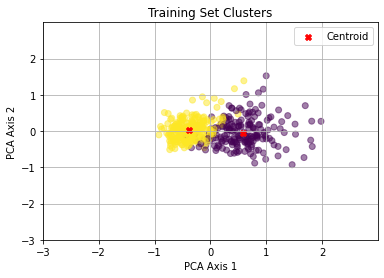

In [ ]:
plt.figure()
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, cmap = 'viridis', alpha = 0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xticks(range(-3,3))
plt.yticks(range(-3,3))
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Training Set Clusters')
plt.grid(True)

plt.scatter(x=classes_mean[:, 0], y=classes_mean[:, 1], c='r', marker='X', label='Centroid')
plt.legend()

## Algoritmo K-Means

Após o treinamento e classificação com base nos dados de treino, será feita a predição e nova clusterização com base nos dados de teste

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2).fit(X_train)
x_pred = kmeans.predict(X_test)

Seguem os centróides obtidos

In [ ]:
kmeans.cluster_centers_

array([[ 0.67613978,  0.02178032],
       [-0.36269794, -0.01350222]])

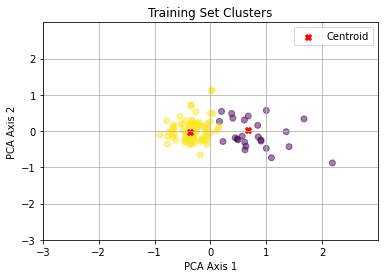

In [ ]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=x_pred, cmap = 'viridis', alpha = 0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xticks(range(-3,3))
plt.yticks(range(-3,3))
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Training Set Clusters')
plt.grid(True)

plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c='r', marker='X', label='Centroid')
plt.legend()

Após feito o novo cálculo dos centróides com base nos dados de teste, a inércia indica quão bem o nosso dataset foi clusterizado usando o K-Means. Sendo assim, o resultado obtido foi

In [ ]:
kmeans.inertia_

88.15716242450387

## Affinity Propagation

Agora vamos fazer a mesma clusterização feita anteriormente utilizando o algoritmo de Affinity Propagation

In [ ]:
from sklearn.cluster import AffinityPropagation

AffProp = AffinityPropagation().fit(X_train)

Com base na implementação via Affinity Propagation, seguem os valores relativos aos centróides

In [ ]:
AffProp.cluster_centers_

array([[ 0.95462147, -0.10970115],
       [ 0.55151238,  0.5886171 ],
       [ 0.70686173,  0.17381608],
       [ 1.27868501,  0.26054467],
       [ 0.19164255,  0.2028438 ],
       [-0.54156091,  0.35964532],
       [-0.38420845, -0.08936378],
       [-0.03128684, -0.17068893],
       [ 1.81645661,  0.27340683],
       [ 0.41848802,  0.12904057],
       [-0.78151933, -0.0570031 ],
       [-0.06665472,  0.78239317],
       [ 0.86172354,  1.05643764],
       [ 0.6175122 , -0.56038663],
       [ 0.33954554, -0.22612409],
       [ 0.11659771, -0.47097798],
       [-0.61957687, -0.30476252],
       [-0.59614234,  0.07219576],
       [ 1.21300445, -0.68573523],
       [-0.37416624,  0.13582052],
       [ 1.82609759, -0.42585805],
       [-0.19971535,  0.05558974],
       [-0.13412505,  0.36567876],
       [-0.38987513, -0.2678525 ],
       [ 0.63978235, -0.19838507]])

In [ ]:
AffProp.cluster_centers_indices_

array([  2,   8,  28,  42,  43,  60,  74, 100, 122, 138, 174, 176, 190,
       233, 253, 274, 287, 299, 339, 344, 352, 355, 380, 395, 446])

Fazendo a clusterização com base nos clusters definidos pelo Affinity Propagation, a predição com os dados de teste, temos uma nova clusterização e um gráfico de dispersão:

In [ ]:
x_pred_affprop = AffProp.predict(X_test)

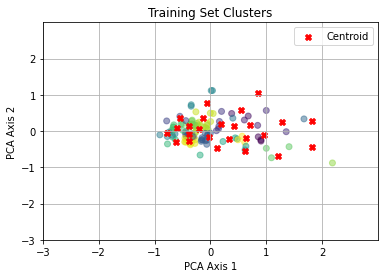

In [ ]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=x_pred_affprop, cmap = 'viridis', alpha = 0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xticks(range(-3,3))
plt.yticks(range(-3,3))
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Training Set Clusters')
plt.grid(True)

plt.scatter(x=AffProp.cluster_centers_[:, 0], y=AffProp.cluster_centers_[:, 1], c='r', marker='X', label='Centroid')
plt.legend()

## Discussão sobre os resultados


Nesse exercício aplicamos o K-means e o Affinity Propagation, métodos de clusterização, em um dataset feito para o problema classificação. Dessa forma poderiamos comparar os resultados obtidos pela aplicação desses métodos de clusterização com os valores reais de uma classificação.

Como usamos uma técnica de redução antes de aplicar a clusterização também acaba-se por avaliar se a redução de dimensionalidade deixa membros de uma mesma classe mais perto uns dos outros.

Primeiro, sobre o método K-means. Calculamos os centroídes de cada cluster com base na parte de treino do dataset. Com isso o modelo foi direcionado a criar os centroides em um local que levasse a uma clusterização mais correta, em relação às categorias do problema de classificação por baixo. Quando comparamos o plot dos dados no gráfico de visualização pós PCA e os dados de teste sendo atribuídos a cada cluster vemos que são imagens que praticamente se sobrepõem. Assim, vemos que o K-means com cálculo de centroíde usando alguma base também funciona bem para esse problema de classificação. Quanto menor o número de clusters e menor a inércia, melhor é o modelo. Visto que temos 2 clusters principais, se aumentássemos o número de clusters, a inércia diminuiria.

Já o Affinity Propagation, com a separação de clusters dependente das iterações do algoritmo não apresentou um resultado tão bom. Na verdade obtivemos uma quantidade de clusters muito superior à quantidade de classes do problema de classificação. Lembrando que o padrão do scikit-learn é realizar 200 iterações. Talvez um maior número de iterações fosse necessário para criar clusters mais relacionados ao problema.

Então, acho que podemos dizer que ao aplicarmos um método de clustering sobre um dataset que sabemos ser voltado para classificação, o mais recomendado é usar um método que possibilite de alguma forma a entrada de informação que ajude a identificar a quantidade de centroídes e uma estimativa de local desses centroídes com base nas classes já conhecidas.